# <font color='red'>----> TRAINED TILL 5th BATCH </font>
### <font color='red'>JUST LOAD 6TH BATCH AND TRAIN</font>

# Demo Training & Testing of Word-Level Lip reading Model

## 0. Getting All necessary Dependencies

In [1]:
# Import the required libraries.

import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *

%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from keras.models import Model

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
# Making sure TF uses GPU
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Getting Dataset

In [4]:
# Getting dataset generation function
from Dataset import create_word_level_dataset

In [5]:
SEQUENCE_LENGTH = 15
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']

In [6]:
print(CLASSES_LIST)

['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']


In [7]:
print(len(CLASSES_LIST))

27


In [8]:
data_path = "../Dataset/Urdu"
speaker_list = os.listdir(data_path)
print(speaker_list)
print("No. of speaker : " , len(speaker_list))

[]
No. of speaker :  0


In [9]:
features, labels= create_word_level_dataset(8, SEQUENCE_LENGTH, CLASSES_LIST)

features = np.asarray(features)
labels = np.asarray(labels)

np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//8_features.npy", features)
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//8_labels.npy", labels)

0 .  wo_kese_hoon_jee_kab_ek


FileNotFoundError: [Errno 2] No such file or directory: '..\\Dataset\\Urdu\\8\\wo_kese_hoon_jee_kab_ek\\align'

In [ ]:
for i in speaker_list:
     
    print("Pre-processing : ", i)

    features, labels= create_word_level_dataset(i, SEQUENCE_LENGTH, CLASSES_LIST)

    features = np.asarray(features)
    labels = np.asarray(labels)
    
    print("Length : ",len(features)," ",len(labels))

    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + i + "_features.npy", features)
    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + i + "_labels.npy", labels)
    

    #del features
    #del labels

In [29]:
features = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\10_features.npy")
labels = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\10_shuffled_labels.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\FYP Workspace\\Urdu Preprocessed numpy SQ15\\10_shuffled_labels.npy'

In [ ]:
print(features.shape)
print(labels.shape)

In [59]:
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//2_all_shuffled_features.npy", features[6347:])
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//2_all_shuffled_labels.npy", labels[6347:])

In [9]:
cnt = 0
for i in speaker_list:
        
    if i != '18':
        print("Loading : ", i)

        fea = np.load(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + i + "_features.npy")
        lab = np.load(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + i + "_labels.npy")
        
        
        cnt += 1 
        if cnt == 1:
            features = fea
            labels = lab
        else:
            features = np.concatenate((features,fea),axis=0)
            labels = np.concatenate((labels,lab),axis=0)

Loading :  0
Loading :  1
Loading :  10
Loading :  12
Loading :  13
Loading :  14
Loading :  15
Loading :  16
Loading :  17
Loading :  3
Loading :  4
Loading :  6
Loading :  7
Loading :  8


In [10]:
print(features.shape)
print(labels.shape)

(16014, 15, 50, 100, 3)
(16014,)


In [11]:
# Get a random permutation of indices
permutation = np.random.permutation(len(features))

# Shuffle the arrays using the same permutation
shuffled_features = features[permutation]
shuffled_labels = labels[permutation]

# Output the shuffled arrays
print("Shuffled features: ", len(shuffled_features))
print("Shuffled labels: ", len(shuffled_labels))

Shuffled features:  16014
Shuffled labels:  16014


In [12]:
print(shuffled_features.shape)
print(shuffled_labels.shape)

(16014, 15, 50, 100, 3)
(16014,)


In [19]:
cnt = 1
a = 0
b = 800
for i in range(0,19):
    
    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//Shuffled 0-14//"+str(cnt)+"_all_shuffled_features.npy", shuffled_features[a:b])
    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//Shuffled 0-14//"+str(cnt)+"_all_shuffled_labels.npy", shuffled_labels[a:b])
    
    print(cnt,":",a," ",b)
    
    a+=800
    b+=800
    cnt+=1

1 : 0   800
2 : 800   1600
3 : 1600   2400
4 : 2400   3200
5 : 3200   4000
6 : 4000   4800
7 : 4800   5600
8 : 5600   6400
9 : 6400   7200
10 : 7200   8000
11 : 8000   8800
12 : 8800   9600
13 : 9600   10400
14 : 10400   11200
15 : 11200   12000
16 : 12000   12800
17 : 12800   13600
18 : 13600   14400
19 : 14400   15200


In [20]:
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//Shuffled 0-14//20_all_shuffled_features.npy", shuffled_features[15200:16014])


In [ ]:
features_train,_,labels_train, _ = train_test_split(features, labels,test_size=0.01, shuffle = True,random_state = seed_constant)

print(features_train.shape)
print(labels_train.shape)
#np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15////" + "all" + "_features.npy", features)
#np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + "all" + "_labels.npy", labels)
#np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + "0" + "_input_len.npy", input_len)

In [33]:
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + "0-13" + "_features.npy", features)
np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + "0-13" + "_labels.npy", labels)

In [38]:
del features
del labels
features = features_train[0:int(len(features_train)/5)]
labels = labels_train[0:int(len(labels_train)/5)]

In [39]:
print(features.shape)
print(labels.shape)

(647, 15, 50, 100, 3)
(647,)


In [3]:
#features = np.load("D://FYP Workspace//Urdu Preprocessed numpy//4_features.npy")
#labels = np.load("D://FYP Workspace//Urdu Preprocessed numpy//4_labels.npy")

# Loading Oversampled s4 data
tmp_f = np.load("D:\\FYP Workspace\\Urdu Preprocessed numpy\\Oversampled\\6_features.npy")
tmp_l = np.load("D:\\FYP Workspace\\Urdu Preprocessed numpy\\Oversampled\\6_labels.npy")

# Splitting features in half to reduce batch size
# - First half
#features = tmp_f[ : int(len(tmp_f)/2)]
#labels = tmp_l[ : int(len(tmp_f)/2)]

# - Second half
features = tmp_f[ int(len(tmp_f)/2) : ]
labels = tmp_l[ int(len(tmp_f)/2) : ]

print(features.shape)
print(labels.shape)

(1188, 13, 50, 100, 3)
(1188,)


In [3]:

features = np.load("6_featureso.npy")
labels = np.load("6_labelso.npy")


In [11]:
a = np.array([2,4,6])
print(a[:1])

[2]


Note :
  STATS of 1 Speaker
- 788 segments with sil AND 619 without sil
- 619 without Augmentation AND 1238 with Augmentation

In [11]:
print(len(features))
print(len(labels))

1206
1206


In [53]:
# Getting frequency of each class for Display
import collections

# using Counter to find frequency of labels
frequency = collections.Counter(labels)

print("BEFORE - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in frequency:
    print(CLASSES_LIST[key], frequency[key])

BEFORE - OVERSAMPLING
TOTAL CLASSES :  27

FRQ   CLASS
وہ 582
کیسے 594
ہوں 306
جی 592
کب 690
ایک 242
آپ 558
ہے 422
کیوں 516
دو 242
تھا 580
تین 260
میں 550
تھے 558
چار 264
پانچھ 262
ہم 598
چھے 262
سات 260
کون 724
آٹھ 264
نوں 256
ہاں 714
نہیں 636
کونسا 584
کدھر 594
کتنے 584


In [54]:
frequency.keys()

dict_keys([5, 1, 15, 6, 7, 19, 10, 0, 17, 3, 14, 9, 13, 21, 2, 8, 22, 4, 26, 20, 23, 11, 12, 16, 24, 25, 18])

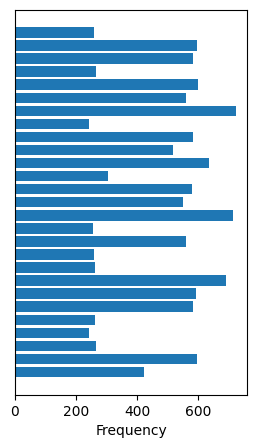

In [55]:
plt.figure(figsize=(3,5))
x = list(frequency.keys())
y = list(frequency.values())
# Plot bar chart with data points
plt.barh(x,y)

plt.xlabel("Frequency")
plt.ylabel("Word")
# Display the plot
plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Word")
plt.show()

### 2.5 Doing Oversampling to overcome imbalanced Dataset

In [23]:
del tmp_features
del tmp_labels

NameError: name 'tmp_features' is not defined

In [7]:
import collections

In [ ]:

# Performing over-sampling
tmp_features = features.tolist()
tmp_labels = labels.tolist()
# using Counter to find frequency of labels
tmp_freq = collections.Counter(tmp_labels)

In [ ]:
print("BEFORE - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in tmp_freq:
    print(CLASSES_LIST[key], '  ', tmp_freq[key])

In [ ]:
print(max(tmp_freq.values()))
tmp_freq.values()

In [ ]:

# Getting freq of most freq class and dividing by 2
highest_freq = int(max(tmp_freq.values()) / 3 )

# Oversampling dataset
i = 0
while i < len(tmp_labels):
    
    #Current class index
    current_class_index = tmp_labels[i]
    
    # Variable for current class
    current_class = CLASSES_LIST[tmp_labels[i]]
    
    # Variable for current class's frequqncy
    current_class_freq = tmp_freq[current_class_index]
    
    # Any class which has frequency less than of most_freq class will be duplicated
    if current_class_freq < highest_freq:
        
        # Appending duplicate at the end of list
        tmp_features.append(tmp_features[i])
        tmp_labels.append(tmp_labels[i])
        #tmp_input_len.append(tmp_input_len[i])
    
        # Updating frequency of duplicated class
        tmp_freq[current_class_index] += 1

    
    # if a class has higher frq than max accepted then delete its occurence
    elif current_class_freq > highest_freq:
        
        # Appending duplicate at the end of list
        tmp_features.remove(tmp_features[i])
        tmp_labels.remove(tmp_labels[i])
        #tmp_input_len.remove(tmp_input_len[i])
    
        # Updating frequency of duplicated class
        tmp_freq[current_class_index] -= 1
    
    # Re-iterating over list if oversampling not complete
    if i == (len(tmp_labels) - 1) and (max(tmp_freq.values()) > highest_freq or min(tmp_freq.values()) < highest_freq):
        print(min(tmp_freq.values()))
        i = 0
    
    if i==0:
        print("hello")
    i += 1

print(len(tmp_features))

In [5]:
import collections

def balance_data(features, labels, classes_list):

    tmp_features = features.tolist()
    tmp_labels = labels.tolist()
    # using Counter to find frequency of labels
    tmp_freq = collections.Counter(tmp_labels)
    
    # Getting freq of most freq class and dividing by 2
    highest_freq = int(max(tmp_freq.values()) / 3 )

    # Oversampling dataset
    i = 0
    while i < len(tmp_labels):

        #Current class index
        current_class_index = tmp_labels[i]

        # Variable for current class
        current_class = CLASSES_LIST[tmp_labels[i]]

        # Variable for current class's frequqncy
        current_class_freq = tmp_freq[current_class_index]

        # Any class which has frequency less than of most_freq class will be duplicated
        if current_class_freq < highest_freq:

            # Appending duplicate at the end of list
            tmp_features.append(tmp_features[i])
            tmp_labels.append(tmp_labels[i])
            #tmp_input_len.append(tmp_input_len[i])

            # Updating frequency of duplicated class
            tmp_freq[current_class_index] += 1


        # if a class has higher frq than max accepted then delete its occurence
        elif current_class_freq > highest_freq:

            # Appending duplicate at the end of list
            tmp_features.remove(tmp_features[i])
            tmp_labels.remove(tmp_labels[i])
            #tmp_input_len.remove(tmp_input_len[i])

            # Updating frequency of duplicated class
            tmp_freq[current_class_index] -= 1

        # Re-iterating over list if oversampling not complete
        if i == (len(tmp_labels) - 1) and (max(tmp_freq.values()) > highest_freq or min(tmp_freq.values()) < highest_freq):
            print(min(tmp_freq.values()))
            i = 0

        i += 1
    
    return tmp_features,tmp_labels
    


In [6]:
for i in range(0,11):
    
    print("Processing 1")
    features = np.load(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + str(i) + "_features.npy")
    labels = np.load(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//" + str(i) + "_labels.npy")
    
    print(features.shape)
    print(labels.shape)
    
    fe,lbl = balance_data(features,labels,CLASSES_LIST)
    
    fe = np.array(fe)
    lbl = np.array(lbl)
    
    print(fe.shape)
    print(lbl.shape)
    
    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//OS//" + str(i) + "_features.npy", fe)
    np.save(r"D://FYP Workspace//Urdu Preprocessed numpy SQ15//OS//" + str(i) + "_labels.npy", lbl)
    
    del fe,lbl,features,labels
    

Processing 1
(1206, 15, 50, 100, 3)
(1206,)
24
(648, 15, 50, 100, 3)
(648,)
Processing 1
(1088, 15, 50, 100, 3)
(1088,)
24
(648, 15, 50, 100, 3)
(648,)
Processing 1
(1244, 15, 50, 100, 3)
(1244,)
24
(648, 15, 50, 100, 3)
(648,)
Processing 1
(1172, 15, 50, 100, 3)
(1172,)
24
(648, 15, 50, 100, 3)
(648,)
Processing 1
(1140, 15, 50, 100, 3)
(1140,)
24
(648, 15, 50, 100, 3)
(648,)
Processing 1
(830, 15, 50, 100, 3)
(830,)
18
(486, 15, 50, 100, 3)
(486,)
Processing 1
(898, 15, 50, 100, 3)
(898,)
18
(486, 15, 50, 100, 3)
(486,)
Processing 1
(1238, 15, 50, 100, 3)
(1238,)
28
(756, 15, 50, 100, 3)
(756,)
Processing 1
(1288, 15, 50, 100, 3)
(1288,)
28
(756, 15, 50, 100, 3)
(756,)
Processing 1
(1296, 15, 50, 100, 3)
(1296,)
29
(783, 15, 50, 100, 3)
(783,)
Processing 1
(1294, 15, 50, 100, 3)
(1294,)
28
(756, 15, 50, 100, 3)
(756,)


In [ ]:
print(highest_freq)
print(min(tmp_freq.values()))
print(tmp_freq.get(0))
print(len(tmp_features))

In [ ]:
# Displaying frequency of Oversampled Dataset

# using Counter to find frequency of labels
#tmp_freq = collections.Counter(tmp_labels)

print("AFTER - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in tmp_freq:
    print(CLASSES_LIST[key], "  " , tmp_freq[key])

In [ ]:
plt.figure(figsize=(3,5))
x = list(tmp_freq.keys())
y = list(tmp_freq.values())
# Plot bar chart with data points
plt.barh(x,y)

plt.xlabel("Frequency")
plt.ylabel("Word")
# Display the plot
plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Word")
plt.show()

In [14]:
del features
del labels

features = np.array(tmp_features)
labels = np.array(tmp_labels)


In [15]:
np.save(r"D://FYP Workspace//Balanced Data Urdu Preprocessed numpy SQ15//" + "0" + "_features.npy", features)
np.save(r"D://FYP Workspace//Balanced Data Urdu Preprocessed numpy SQ15//" + "0" + "_labels.npy", labels)

In [42]:
print(features.shape)
print(labels.shape)

(648, 13, 50, 100, 3)
(648,)


In [25]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [26]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.20, shuffle = True,
                                                                            random_state = seed_constant)

In [6]:
features.shape

(1188, 13, 50, 100, 3)

In [7]:
print(labels_train.shape)
print(labels_test.shape)

(950, 27)
(238, 27)


NameError: name 'labels_train' is not defined

## 2. Preparing the labels for CTC Loss

Learn more about CTC loss and why its amazing for text recognition from [here](https://theailearner.com/2019/05/29/connectionist-temporal-classificationctc/).

The labels have to be converted to numbers which represent each character in the training set. The 'alphabets' consist of A-Z and three special characters (-  '  and space). 

<font color='red'>
<b>TO-DO :</b><br>
    - Complete preperation of labels <br>
    - Buil new functional model
</font> 

In [4]:
# Important variables DEFINED IN PREPROCESSOR FILES
SEQUENCE_LENGTH = 15
IMAGE_HEIGHT = 50 
IMAGE_WIDTH = 100
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھ', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نو', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']
#CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا'
#                , 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']

In [5]:
print(max(CLASSES_LIST, key=len)," ",len(max(CLASSES_LIST, key=len)))

پانچھ   5


In [6]:
#alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
#alphabets = "آابپتثٹجچحخدڑقزرڑزژسشصضطظعغفقکگلمنوھہیےں- '"
alphabets = "اٹتپکھودےآسرہبںنچجمی"
max_str_len = len(max(CLASSES_LIST, key=len)) #=5 max length of input labels
num_of_characters = len(set(alphabets)) + 1 # +1 for ctc pseudo blank
num_of_timestamps = SEQUENCE_LENGTH#len(max(CLASSES_LIST, key=len)) #=64 max length of predicted labels

In [7]:
#alphabets = "ژفنحلٹمھآکگوزید-ڑرثص'چاےسغجطشعتظضبقہپخ"
print(alphabets)
print(len(alphabets))

اٹتپکھودےآسرہبںنچجمی
20


In [8]:
print(set(alphabets))

{'ں', 'ا', 'ن', 'ر', 'م', 'آ', 'ب', 'ٹ', 'ت', 'ے', 'ہ', 'ج', 'س', 'و', 'پ', 'ھ', 'ی', 'د', 'چ', 'ک'}


In [9]:
max_str_len

5

In [10]:
num_of_characters

21

In [11]:
def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [12]:
# Temp
#del features,labels
batch_id = 19
#batch 3 only trained for 50 epochs
features_train = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Shuffled 0-14//"+ str(batch_id) +"_all_shuffled_features.npy")
labels_train = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Shuffled 0-14//"+ str(batch_id) +"_all_shuffled_labels.npy")

#(7190, 15, 50, 100, 3)
#(7190, 15, 50, 100, 3)

In [13]:
print(features_train.shape)
print(labels_train.shape)

(800, 15, 50, 100, 3)
(800,)


In [12]:
features_valid = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Test\18_features.npy")
labels_valid = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Test\18_labels.npy")

# Get a random permutation of indices
permutation = np.random.permutation(len(features_valid))

# Shuffle the arrays using the same permutation
features_valid = features_valid[permutation]
labels_valid = labels_valid[permutation]

print(features_valid.shape)
print(labels_valid.shape)

(864, 15, 50, 100, 3)
(864,)


In [13]:
features_valid = features_valid[300:380]
labels_valid = labels_valid[300:380]

In [14]:
print(labels_valid)
"""[20 20 18  9 12 22 10 23 23  6 18 15  8 25  9 20  0  8 17  1 17 23  9 19
 24 21  8  4  3 14 14 20  1 15 25 20 20 20  7  4 13  7 10 10 15 22 20 13
 11 17 23  1  5 13 18  2 12 12  3 25 24 24 20  7 18 22 26 10 11 25 20 23
 25  3  1  3 16 18  1 13]"""

[20 22 13 22 18  0  8  4  9  9  1 13 24 19  8 12 25 12 24 24  1  1  5 13
  1 12 18 10 13 22  2 14 26 10  8 24 20  6  2  1 25  3  5  4 18 15 22 13
 14 15 21 10 25 13 10  7 24 26 16  2 13 12 16  1 23  3 23  6 25 21 13 22
 22  5 15 10  1 19 19 12]


'[20 20 18  9 12 22 10 23 23  6 18 15  8 25  9 20  0  8 17  1 17 23  9 19\n 24 21  8  4  3 14 14 20  1 15 25 20 20 20  7  4 13  7 10 10 15 22 20 13\n 11 17 23  1  5 13 18  2 12 12  3 25 24 24 20  7 18 22 26 10 11 25 20 23\n 25  3  1  3 16 18  1 13]'

In [15]:
#features_train = features
#labels_train = labels
#Split the Data into Train ( 75% ) and Test Set ( 25% ).
#features_train, features_valid, labels_train, labels_valid = train_test_split(features, labels,
#                                                                    test_size = 0.05, shuffle = True,random_state = seed_constant)

In [16]:
#print("Original : ",len(features), len(labels))
print("Train    : ",len(features_train), len(labels_train))
print("Valid    : ",len(features_valid), len(labels_valid))

NameError: name 'features_train' is not defined

In [ ]:
# Temp
train_size = len(features_train)
valid_size = len(features_valid)

* **train_y** contains the true labels converted to numbers and padded with -1. The length of each label is equal to max_str_len. 
* **train_label_len** contains the length of each true label (without padding) 
* **train_input_len** contains the length of each predicted label. The length of all the predicted labels is constant i.e number of timestamps - 2.  
* **train_output** is a dummy output for ctc loss. 


<font color='red'> NOTE :  KEEP IN MIND : Loaded labels contain index of class in `CLASSES_LIST` </font>

In [ ]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size,1])
train_input_len = np.ones([train_size,1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(CLASSES_LIST[labels_train[i]])
    train_y[i, 0:len(CLASSES_LIST[labels_train[i]])]= label_to_num(CLASSES_LIST[labels_train[i]])
    #print(CLASSES_LIST[labels_train[i]])
    #print(train_label_len[i])
    #print(train_y[i])
    #print(label_to_num(CLASSES_LIST[labels_train[i]]))


In [17]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size,1])
valid_input_len = np.ones([valid_size,1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(CLASSES_LIST[labels_valid[i]])
    valid_y[i, 0:len(CLASSES_LIST[labels_valid[i]])]= label_to_num(CLASSES_LIST[labels_valid[i]])
    #print(CLASSES_LIST[labels_valid[i]])
    #print(valid_label_len[i])
    #print(valid_y[i])

NameError: name 'valid_size' is not defined

In [18]:
# Displaying random results
print('True label : ',CLASSES_LIST[labels_train[5]] , '\ntrain_y : ',train_y[5],'\ntrain_label_len : ',train_label_len[5], 
      '\ntrain_input_len : ', train_input_len[5])
print("\n")
print('True label : ',CLASSES_LIST[labels_valid[0]] , '\nvalid_y : ',valid_y[0],'\ntrain_label_len : ',valid_label_len[0], 
     '\ntrain_input_len : ', valid_input_len[0])

NameError: name 'labels_train' is not defined

In [19]:
train_x = features_train
valid_x = features_valid

NameError: name 'features_train' is not defined

In [20]:
print(train_x.shape)
print(train_y.shape)
print(train_label_len.shape)
print(train_input_len.shape)
print(train_output.shape)

NameError: name 'train_x' is not defined

## 3. Building and Training Model

In [21]:
from keras import backend as K
# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [22]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

In [23]:
from tensorflow.keras import regularizers
IMAGE_HEIGHT = 50
IMAGE_WIDTH = 100

input_data = Input(shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3), name='input')

x = TimeDistributed(Conv2D(16, (3, 3), padding='valid', activation='relu'))(input_data)
x = TimeDistributed(MaxPooling2D((2, 2)))(x)
x = TimeDistributed(Dropout(0.25))(x)

x = TimeDistributed(Conv2D(32, (3, 3), padding='valid', activation='relu'))(input_data)
x = TimeDistributed(MaxPooling2D((2, 2)))(x)
x = TimeDistributed(Dropout(0.25))(x)

x = TimeDistributed(Conv2D(64, (3, 3), padding='valid', activation='relu'))(x)
x = TimeDistributed(MaxPooling2D((2, 2)))(x)
x = TimeDistributed(Dropout(0.25))(x)

#x = TimeDistributed(Conv2D(64, (3, 3), padding='valid', activation='relu'))(x)
#x = TimeDistributed(MaxPooling2D((1, 2)))(x)
#x = TimeDistributed(Dropout(0.25))(x)

#x = TimeDistributed(Conv2D(128, (3, 3), padding='valid', activation='relu'))(x)
#x = TimeDistributed(MaxPooling2D((1, 2)))(x)
#x = TimeDistributed(Dropout(0.25))(x)

x = Reshape(target_shape=((SEQUENCE_LENGTH, -1)), name='reshape')(x)
#x = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(x)

rnn_size = 128

lstm_layer = GRU(rnn_size, return_sequences=True, name='lstm1')
x = Bidirectional(lstm_layer)(x)
x = Bidirectional(lstm_layer)(x)
#x=LSTM(rnn_size, return_sequences=True, name='lstm1')(x)

#x = Dense(64, name="dense_1")(x)
x = Dropout(rate=0.25)(x)

## OUTPUT
x = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
y_pred = Activation('softmax', name='softmax')(x)

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)


In [24]:
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 15, 50, 100  0           []                               
                                , 3)]                                                             
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 15, 48, 98,   896        ['input[0][0]']                  
 buted)                         32)                                                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 15, 24, 49,   0          ['time_distributed_3[0][0]']     
 buted)                         32)                                                           

In [25]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

In [26]:
from tensorflow.keras.callbacks import TensorBoard # For Logging tensor board
log_dir = os.path.join('../Models/Unidir_CTC/Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [27]:

#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
mc = ModelCheckpoint('New_model_GRU_BEST_VALL-LOSS_checkpoint.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50)

# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.00001))

#model_final.load_weights('New_model_GRU_BEST-LOSS_batchid_12_valloss_7.38.h5')

#model_final.load_weights('New_model_GRU_BEST-LOSS_batchid_'+str(batch_id-1)+'.h5')
model_final.load_weights('New_model_GRU_BEST-LOSS_batchid_19valloss_7.73.h5')
#model_final.load_weights("final_model_ctc_2BILSTM128_speaker-0to10_11valid.h5")

In [32]:

his = model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=250, batch_size=16,callbacks = [mc,es])

Epoch 1/250
50/50 [==============================] - ETA: 0s - loss: 6.0429
Epoch 1: val_loss improved from inf to 7.73672, saving model to New_model_GRU_BEST_VALL-LOSS_checkpoint.h5
50/50 [==============================] - 12s 101ms/step - loss: 6.0429 - val_loss: 7.7367
Epoch 2/250
50/50 [==============================] - ETA: 0s - loss: 5.6593
Epoch 2: val_loss did not improve from 7.73672
50/50 [==============================] - 4s 82ms/step - loss: 5.6593 - val_loss: 8.2632
Epoch 3/250
50/50 [==============================] - ETA: 0s - loss: 5.4954
Epoch 3: val_loss did not improve from 7.73672
50/50 [==============================] - 4s 71ms/step - loss: 5.4954 - val_loss: 7.9545
Epoch 4/250
50/50 [==============================] - ETA: 0s - loss: 5.3416
Epoch 4: val_loss did not improve from 7.73672
50/50 [==============================] - 4s 70ms/step - loss: 5.3416 - val_loss: 7.9794
Epoch 5/250
50/50 [==============================] - ETA: 0s - loss: 5.0932
Epoch 5: val_loss 

KeyboardInterrupt: 

In [33]:
model_final.save("New_model_GRU_BEST-LOSS_batchid_" + str(batch_id) + ".h5")
model_final.save("New_model_GRU_BEST-LOSS_batchid_" + str(batch_id) + "valloss_7.73.h5")

# <font color='red'>----> TRAINED TILL 5th BATCH </font>
### <font color='red'>JUST LOAD 6TH BATCH AND TRAIN</font>

model_evaluation_history = model_final.evaluate(features, labels)

## 3.1 Plotting Training History

In [38]:
print(his.history.keys())

dict_keys(['loss', 'val_loss'])


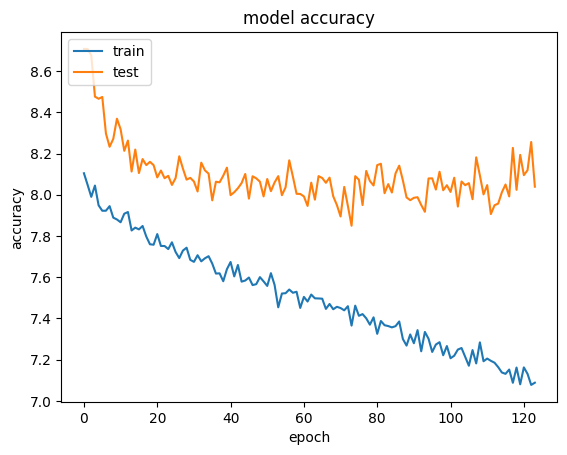

In [37]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4. Making Prediction

<font color='red'>
<b>TO-DO :</b><br>
    - Perform prediction on Valid set <br>
    - Perform prediction on a Video
</font> 

In [42]:
valid_x.shape

(80, 15, 50, 100, 3)

In [28]:
#del features, labels
features_valid = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Test\18_features.npy")
labels_valid = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\Test\18_labels.npy")

#features_valid = features_valid[0:50]
#labels_valid = labels_valid[0:50]


In [29]:
import keras

#features = features_valid
#labels = labels_valid

pred_model = keras.models.Model(
    model_final.get_layer(name="input").input, model_final.get_layer(name="softmax").output
)

preds = pred_model.predict(features_valid)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], greedy=True)[0][0])

cnt = 0

prediction = []
for i in range(len(features_valid)):
    
    lol=0
    if num_to_label(decoded[i]) == CLASSES_LIST[labels_valid[i]]:
        lol = "1"
        cnt +=1
    
    print(num_to_label(decoded[i])," -- ", CLASSES_LIST[labels_valid[i]]," - ", lol)
    prediction.append(num_to_label(decoded[i]))

27/27 [==============================] - 4s 28ms/step
کی  --  کیسے  -  0
کون  --  جی  -  0
کر  --  ایک  -  0
کی  --  کیسے  -  0
کج  --  جی  -  0
کیر  --  ایک  -  0
کھ  --  آپ  -  0
کتسے  --  کیسے  -  0
کجی  --  جی  -  0
ک  --  آپ  -  0
کتسے  --  کیسے  -  0
جی  --  جی  -  1
کھے  --  کیسے  -  0
کتھے  --  تھا  -  0
کسھ  --  تین  -  0
کتسے  --  کیسے  -  0
کتھے  --  تھا  -  0
کسھ  --  تین  -  0
کھر  --  میں  -  0
کسے  --  کیسے  -  0
ون  --  چار  -  0
کسر  --  میں  -  0
کتسے  --  کیسے  -  0
ون  --  چار  -  0
ون  --  آپ  -  0
کست  --  کیسے  -  0
کتھے  --  تھا  -  0
و  --  کیوں  -  0
کچھ  --  پانچھ  -  0
ک  --  آپ  -  0
کسے  --  کیسے  -  0
کتھے  --  تھا  -  0
ی  --  کیوں  -  0
کچھ  --  پانچھ  -  0
کھ  --  ہم  -  0
کھ  --  کیسے  -  0
و  --  ہوں  -  0
جی  --  کیوں  -  0
کت  --  ہم  -  0
کیے  --  کیسے  -  0
و  --  ہوں  -  0
کجی  --  کیوں  -  0
ب  --  آپ  -  0
کھر  --  کیسے  -  0
و  --  ہوں  -  0
کجا  --  جی  -  0
کجی  --  کیوں  -  0
و  --  سات  -  0
ب  --  آپ  -  0
کسھ  --  کیسے  -  0
و  --  ہوں 

In [32]:
import re
from collections import Counter

def correct_word(word_list, target_word, n=1):
    target_ngrams = Counter([target_word[i:i+n] for i in range(len(target_word)-n+1)])
    best_match, best_match_score = None, 0
    for word in word_list:
        word_ngrams = Counter([word[i:i+n] for i in range(len(word)-n+1)])
        score = sum((word_ngrams & target_ngrams).values())
        if score > best_match_score:
            best_match, best_match_score = word, score
    return best_match

print(CLASSES_LIST)
word_list = CLASSES_LIST
target_word = ''
closest_word = correct_word(word_list, target_word)
print(closest_word)  # Output: apple

['ہے', 'کیسے', 'چار', 'دو', 'چھ', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نو', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']
None


In [35]:
cnt=0
for i in range(len(features_valid)):
    
    target_word = num_to_label(decoded[i])
    
    closest_word = correct_word(word_list, target_word,n=2)
    
    if closest_word == None:
        closest_word = correct_word(word_list, target_word,n=1)
    
    lol=0
    if closest_word == CLASSES_LIST[labels_valid[i]]:
        lol = "1"
        cnt +=1
    
    print( num_to_label(decoded[i]),"  ",closest_word," -- ", CLASSES_LIST[labels_valid[i]]," - ", lol)
    prediction.append(num_to_label(decoded[i]))

کی    کیسے  --  کیسے  -  1
کون    کون  --  جی  -  0
کر    کدھر  --  ایک  -  0
کی    کیسے  --  کیسے  -  1
کج    کیسے  --  جی  -  0
کیر    کیسے  --  ایک  -  0
کھ    کدھر  --  آپ  -  0
کتسے    کیسے  --  کیسے  -  1
کجی    جی  --  جی  -  1
ک    کیسے  --  آپ  -  0
کتسے    کیسے  --  کیسے  -  1
جی    جی  --  جی  -  1
کھے    تھے  --  کیسے  -  0
کتھے    تھے  --  تھا  -  0
کسھ    کیسے  --  تین  -  0
کتسے    کیسے  --  کیسے  -  1
کتھے    تھے  --  تھا  -  0
کسھ    کیسے  --  تین  -  0
کھر    کدھر  --  میں  -  0
کسے    کیسے  --  کیسے  -  1
ون    کون  --  چار  -  0
کسر    کیسے  --  میں  -  0
کتسے    کیسے  --  کیسے  -  1
ون    کون  --  چار  -  0
ون    کون  --  آپ  -  0
کست    کیسے  --  کیسے  -  1
کتھے    تھے  --  تھا  -  0
و    دو  --  کیوں  -  0
کچھ    چھ  --  پانچھ  -  0
ک    کیسے  --  آپ  -  0
کسے    کیسے  --  کیسے  -  1
کتھے    تھے  --  تھا  -  0
ی    کیسے  --  کیوں  -  0
کچھ    چھ  --  پانچھ  -  0
کھ    کدھر  --  ہم  -  0
کھ    کدھر  --  کیسے  -  0
و    دو  --  ہوں  -  0
جی    جی  --  کیوں  -  0
کت

In [36]:
print(cnt)
print(len(features_valid))

164
864


In [30]:
seq.shape[1]

50

In [31]:
# importing libraries
import cv2
from lips import crop_lips
import mediapipe as mp
import keras

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


# Declare a queue to store video frames.
frames_queue = deque(maxlen = SEQUENCE_LENGTH)

# Initialize a variable to store the predicted action being performed in the video.
predicted_class_name = ''

sentence = []
predictions = []
threshold = 0.0 # Result rendered only if they are above this threshold

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(r"D:\FYP Workspace\Raw Data\18\aap_kese_thay_han_kab_chaar\_video.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")


preds = []

pred_model = keras.models.Model(model_final.get_layer(name="input").input, model_final.get_layer(name="softmax").output)

cnt = 0
with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:    
    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # If frame correctly read only then performing predictions
        if ret == True:
            
            # Cropping lips
            cropped_image = crop_lips(frame, holistic)

            # Normalizing the cropped frame
            normalized_frame = cropped_image / 255    
            
            # Appending the pre-processed frame into the frames list.
            frames_queue.append(normalized_frame)
            
            # Check if the number of frames in the queue are equal to the fixed sequence length.
            if len(frames_queue) == SEQUENCE_LENGTH:
                
                seq = np.asarray(frames_queue)
                print(seq.shape)
                print("Res ",seq.reshape(1, 15, 50, 100, 3).shape)
                res = pred_model.predict(seq.reshape(1, 15, 50, 100, 3))
                
                decoded = K.get_value(K.ctc_decode(res, input_length=np.ones(res.shape[0])*res.shape[1], greedy=True)[0][0])
                print(num_to_label(decoded[0]))
                #res = model.predict(image.reshape(1, 256, 64, 1))
                # Pass the normalized frames to the model and get the predicted probabilities.
                #res = model_final.predict(np.expand_dims(frames_queue, axis = 0))[0]

                # Appending prediction in the Predictions List
                #predictions.append(np.argmax(res))
            
            cv2.imshow("Frame",normalized_frame)
            
        # Press Q on keyboard to exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break

        # Break the loop
        else:
            break
  

 # When everything done, release the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 1s 988ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 24ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 29ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 30ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 29ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 25ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 25ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 28ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 29ms/step
ھے
(15, 50, 100, 3)
Res  (1, 15, 50, 100, 3)
1/1 [==============================] - 0s 26ms/step
تھے
(15, 50, 100, 3)
Res  (1, 15

In [26]:
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

In [49]:
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']
alphabets = ""
for i in CLASSES_LIST:
    alphabets+= i

In [34]:
len(set(alphabets))

20

In [36]:
set(alphabets)

{'آ',
 'ا',
 'ب',
 'ت',
 'ج',
 'د',
 'ر',
 'س',
 'م',
 'ن',
 'و',
 'ٹ',
 'پ',
 'چ',
 'ک',
 'ں',
 'ھ',
 'ہ',
 'ی',
 'ے'}

In [41]:
import numpy as np

# Create example features and labels arrays
features = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\all_features.npy")
labels = np.load(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\all_labels.npy")

# Get a random permutation of indices
permutation = np.random.permutation(len(features))

# Shuffle the arrays using the same permutation
shuffled_features = features[permutation]
shuffled_labels = labels[permutation]

# Output the shuffled arrays
print("Shuffled features: ", shuffled_features)
print("Shuffled labels: ", shuffled_labels)

Shuffled features:  [[[[[0.99607843 0.82745098 0.77254902]
    [1.         0.84313725 0.78823529]
    [1.         0.84705882 0.79215686]
    ...
    [0.85098039 0.61176471 0.55294118]
    [0.85490196 0.61176471 0.55294118]
    [0.8627451  0.61960784 0.56078431]]

   [[0.99607843 0.82352941 0.76078431]
    [1.         0.83529412 0.76862745]
    [1.         0.84313725 0.77254902]
    ...
    [0.83921569 0.60392157 0.54117647]
    [0.84313725 0.60392157 0.54117647]
    [0.85098039 0.61176471 0.54901961]]

   [[1.         0.81960784 0.76470588]
    [1.         0.83137255 0.77254902]
    [1.         0.83137255 0.76862745]
    ...
    [0.83921569 0.61176471 0.52156863]
    [0.84313725 0.61176471 0.5254902 ]
    [0.84313725 0.61176471 0.52941176]]

   ...

   [[0.74117647 0.55294118 0.51764706]
    [0.76078431 0.56862745 0.53333333]
    [0.76470588 0.56862745 0.52941176]
    ...
    [0.35294118 0.22352941 0.19215686]
    [0.3254902  0.21176471 0.18823529]
    [0.2627451  0.16078431 0.14117647

In [42]:
print(features.shape)
print(labels.shape)
print(shuffled_features.shape)
print(shuffled_labels.shape)

(12694, 15, 50, 100, 3)
(12694,)
(12694, 15, 50, 100, 3)
(12694,)


In [43]:
print(shuffled_labels[0])
print(labels[0])

1
5


In [45]:
np.save(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\all_shuffled_features.npy",shuffled_features)
np.save(r"D:\FYP Workspace\Urdu Preprocessed numpy SQ15\all_shuffled_labels.npy",shuffled_labels)

In [3]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()